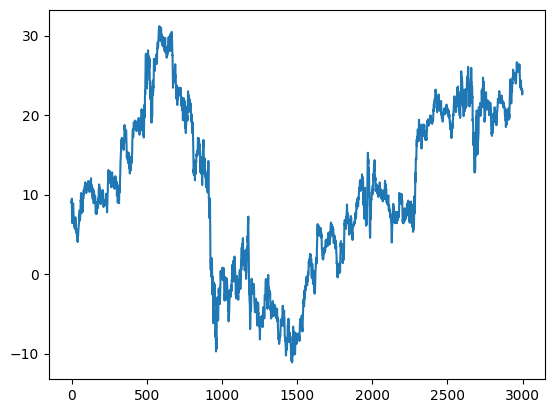

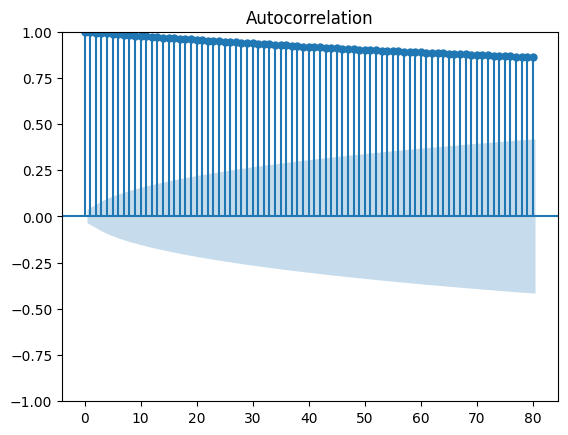

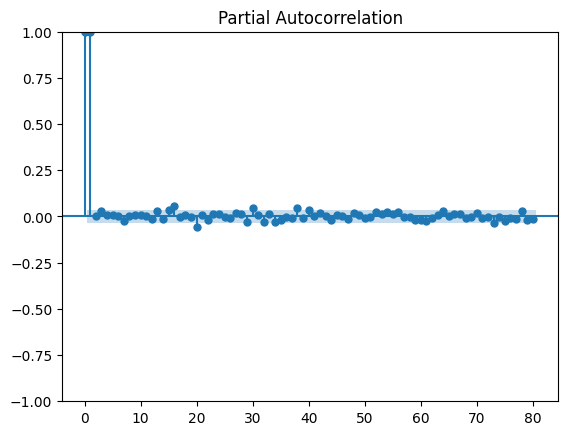

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

data = pd.read_csv('Individual_Homework.csv', sep=';', decimal=',')
series = data.iloc[:,0]

y = series

N = 80
num_lags = N # Es el número de saltos hacia atrás, depende de la granularidad

plt.plot(y)
plt.show()
plot_acf(y, lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

De los resultados obtenidos en la parte superior, podemos analizar que la media parece no ser constante y que existe autocorrelación por lo tanto nuestra intuición nos dice que es una serie no estacionaria.

In [4]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print('Mean', mean, 'Standard deviation', std, 'skewness', skewness, 'kurtosis', kurtosis)

Mean 10.881964333333332 Standard deviation 10.284162628870725 skewness -0.1703238333849572 kurtosis -0.9889095754213968


In [5]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -1.6874217383898138
p-value: 0.43760454966756995


Del ADF test superior, podemos extraer que al ser p_value > 0.05, nos quedamos con H0, es decir, aseguramos que el proceso no es estacionario.

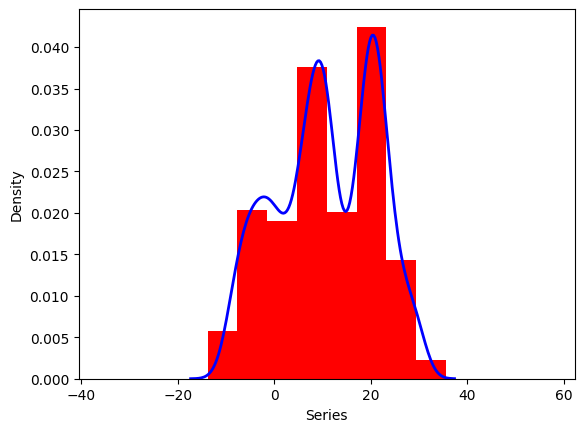

Saphiro ShapiroResult(statistic=np.float64(0.9671059660540652), pvalue=np.float64(1.1942531265152575e-25))
mean 10.881964333333332 std 10.284162628870725


In [6]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

Gracias a la gráfica podemos ver claramente que no sigue una distribución normal. Además, el p-valor < 0.05, nos asegura que debemos rechazar la hipótesis nula H0 y quedarnos con H1 (Distribución NO normal)

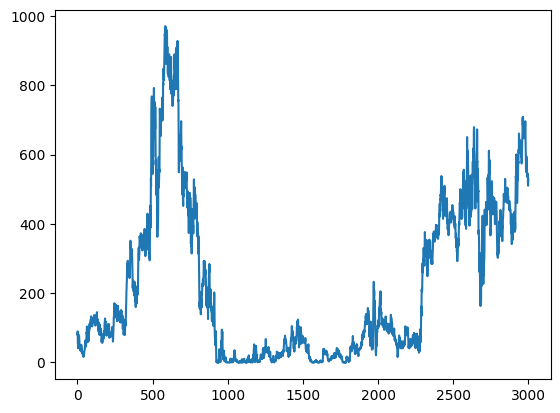

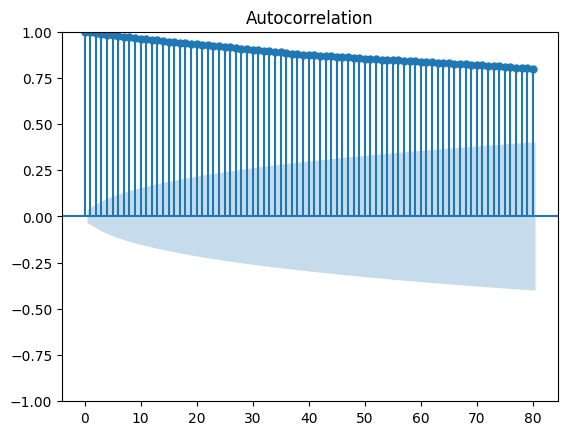

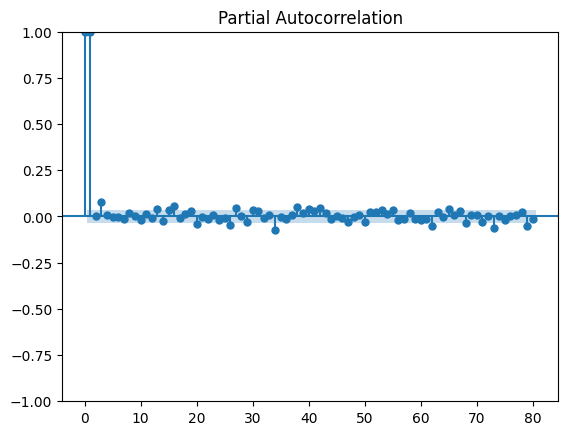

In [7]:
plt.plot((y**2))
plt.show()
plot_acf((y**2), lags=num_lags)
plt.show()
plot_pacf((y**2),lags=num_lags)
plt.show()

De los resultados superiores, podemos extraer que además de existir autocorrelación en Yt, existe autocorrelación en Yt^2 y por lo tanto tenemos un modelo no lineal.

### AHORA TRANSFORMAMOS LA SERIE:

Aplicamos la tranformación de las diferencias al tener media no constante

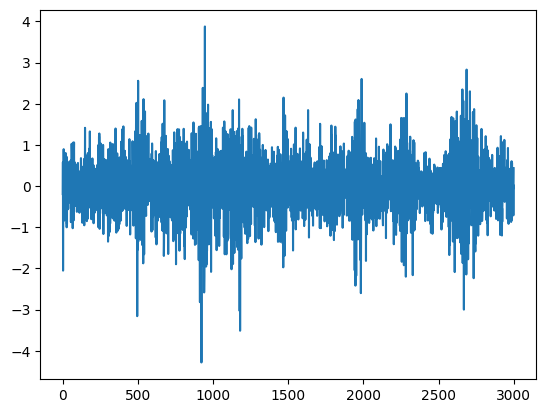

In [11]:
z = y.diff().dropna()

plt.plot(z)

En la gráfica superior podemos ver como tanto la media como la dispersión parece ser constante, por lo que intuimos que es una serie estacionaria

In [13]:
# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(z,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the transformed series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the transformed series
Statistic Value: -40.101670583747975
p-value: 0.0


Gracias al ADF test, al tener un p-valor = 0 < 0.05, rechazamos H0 y nos quedamos con H1, es decir aseguramos que la serie transformada es estacionaria.

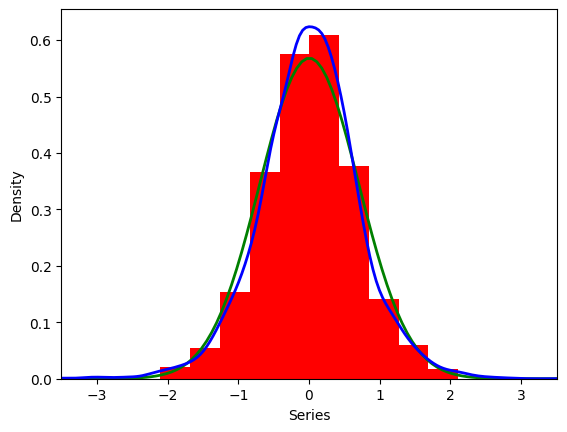

In [21]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

En la gráfica superior podemos ver como no parece seguir una distribución normal.

In [24]:
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])
print("Ljung-Box for z") 
print(box_test)

Saphiro ShapiroResult(statistic=np.float64(0.985839897218068), pvalue=np.float64(9.54563289859135e-17))
Ljung-Box for z
      lb_stat  lb_pvalue
50  78.658829   0.005963


Gracias al Saphiro test superior podemos ver como el p-valor está por debajo de 0.05, rechazamos H0 y nos quedamos con H1 es decir, No sigue una distrución normal.

In [12]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(z)
std = np.std(z)
kurtosis = kurtosis(z)
skewness = skew(z)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean 0.004649883294431477 Standard deviation 0.7022322404297499 Skewness -0.1525909093880552 Kurtosis 1.826964413636106


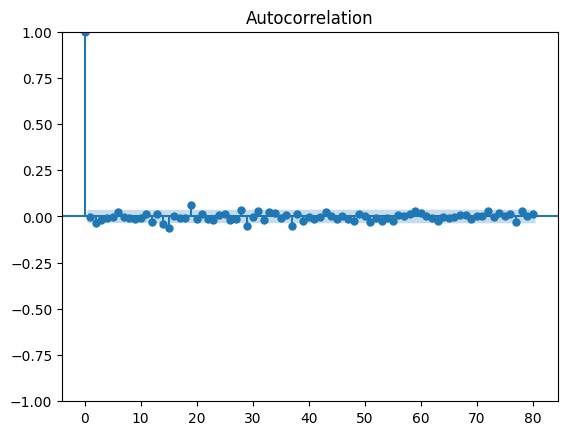

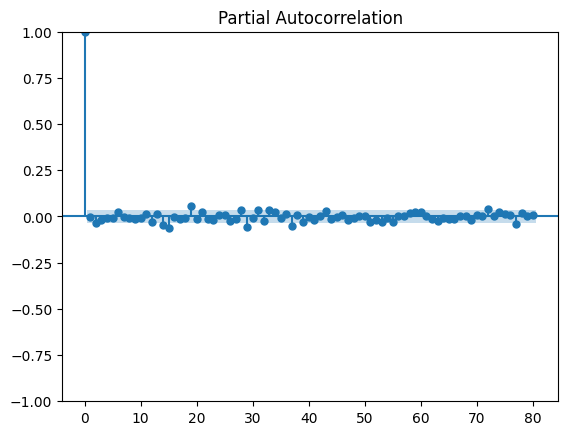

In [23]:
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

En función a los resultados superiores, teniendo en cuenta que hemos comprobado ya que es estacionaria y viendo que la media parece ser prácticamente 0 y que parece no haber autocorrelación podríamos según nuestra intuición decir que es ruido blanco.

In [16]:
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[20])
print("Ljung-Box for z") 
print(box_test)

Ljung-Box for z
      lb_stat  lb_pvalue
20  40.011936   0.004978


Debido a los resultados obtenidos en el Ljung-Box superior, vemos que el p-valor < 0.05, rechazando H0 y nos quedamos con H1 es decir hay autocorrelación por lo tanto NO tenemos ruido blanco.

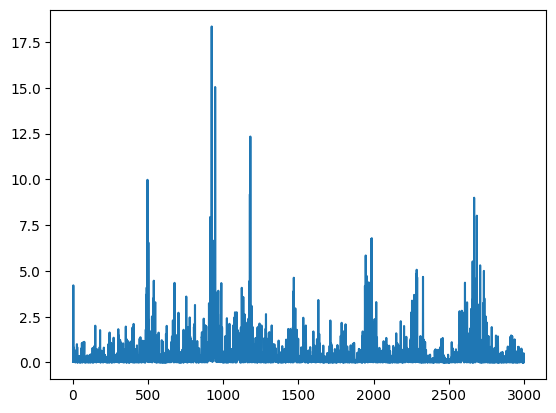

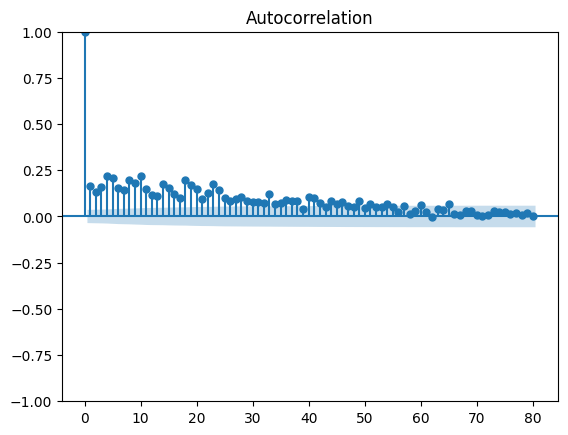

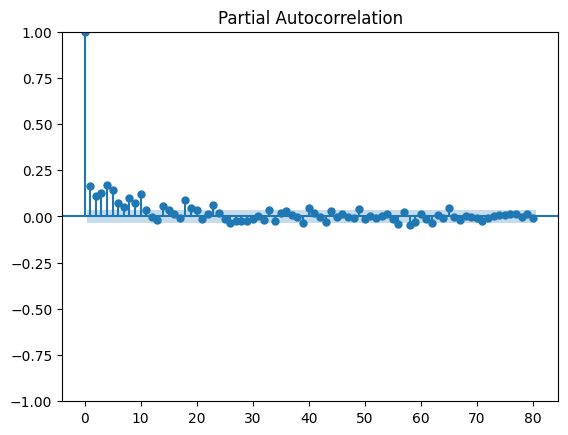

In [26]:
plt.plot(z**2)
plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()

In [14]:
import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test2)

Ljung-Box for z**2
       lb_stat  lb_pvalue
20  1632.10372        0.0


Finalmente, gracias a los resultados superiores podemos ver que hay autocorrelacion en Zt^^2 por lo tanto podemos saber que sigue un modelo no lineal.